# GloVe Example

## Download GloVe Embeddings

In [29]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
!unzip glove*.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


## Transform GloVe embeddings to Word2Vec format

In [49]:
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd

glove_input_file = 'glove.6B.50d.txt'
w2v_output_file = 'glv_with_w2v_format.txt'

glove2word2vec(glove_input_file, w2v_output_file) #convert GloVe vectors into the word2vec

C:\Users\mtsourma\AppData\Local\Temp\ipykernel_17244\1543968405.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, w2v_output_file) #convert GloVe vectors into the word2vec


(400000, 50)

Observe word and respective vector

In [50]:
with open(w2v_output_file, 'r') as infile:
    w2v = infile.read().splitlines()

w2v_dict = {
    'word': [],
    'vector': []
}

for word_vector_pair in w2v[1:22]:
    word_vector_pair = word_vector_pair.split()
    word = word_vector_pair[0]
    vector = word_vector_pair[1:]
    w2v_dict['word'].append(word)
    w2v_dict['vector'].append(vector)

w2v_df = pd.DataFrame.from_dict(w2v_dict)

w2v_df

,word,vector
0,the,"[0.418, 0.24968, -0.41242, 0.1217, 0.34527, -0..."
1,",","[0.013441, 0.23682, -0.16899, 0.40951, 0.63812..."
2,.,"[0.15164, 0.30177, -0.16763, 0.17684, 0.31719,..."
3,of,"[0.70853, 0.57088, -0.4716, 0.18048, 0.54449, ..."
4,to,"[0.68047, -0.039263, 0.30186, -0.17792, 0.4296..."
5,and,"[0.26818, 0.14346, -0.27877, 0.016257, 0.11384..."
6,in,"[0.33042, 0.24995, -0.60874, 0.10923, 0.036372..."
7,a,"[0.21705, 0.46515, -0.46757, 0.10082, 1.0135, ..."
8,"""","[0.25769, 0.45629, -0.76974, -0.37679, 0.59272..."
9,'s,"[0.23727, 0.40478, -0.20547, 0.58805, 0.65533,..."


In [52]:
w2v_df["vector"][0]

['0.418',
 '0.24968',
 '-0.41242',
 '0.1217',
 '0.34527',
 '-0.044457',
 '-0.49688',
 '-0.17862',
 '-0.00066023',
 '-0.6566',
 '0.27843',
 '-0.14767',
 '-0.55677',
 '0.14658',
 '-0.0095095',
 '0.011658',
 '0.10204',
 '-0.12792',
 '-0.8443',
 '-0.12181',
 '-0.016801',
 '-0.33279',
 '-0.1552',
 '-0.23131',
 '-0.19181',
 '-1.8823',
 '-0.76746',
 '0.099051',
 '-0.42125',
 '-0.19526',
 '4.0071',
 '-0.18594',
 '-0.52287',
 '-0.31681',
 '0.00059213',
 '0.0074449',
 '0.17778',
 '-0.15897',
 '0.012041',
 '-0.054223',
 '-0.29871',
 '-0.15749',
 '-0.34758',
 '-0.045637',
 '-0.44251',
 '0.18785',
 '0.0027849',
 '-0.18411',
 '-0.11514',
 '-0.78581']

## Examples of semantically similar words

In [53]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(w2v_output_file, binary=False)

In [54]:
most_similar_woman = model.most_similar('woman')
most_similar_man = model.most_similar('man')

print(f'Most semantically similar to word Woman:')
print(f'\n{" "*5}word{" "*10}  similarity score')
print(f'{"="*43}')
for w in most_similar_woman:
    print(f'{" "*5}{w[0]:15}{w[1]}')

print(f'\n\nMost semantically similar to word Man:')
print(f'\n{" "*5}word{" "*10}  similarity score')
print(f'{"="*43}')
for w in most_similar_man:
    print(f'{" "*5}{w[0]:15}{w[1]}')

Most semantically similar to word Woman:

     word            similarity score
     girl           0.9065280556678772
     man            0.8860336542129517
     mother         0.8763704299926758
     her            0.8613135814666748
     boy            0.859611988067627
     she            0.8430695533752441
     herself        0.8224568367004395
     child          0.8108214139938354
     wife           0.8037394285202026
     old            0.7982394695281982


Most semantically similar to word Man:

     word            similarity score
     woman          0.8860337734222412
     boy            0.8564431071281433
     another        0.8452839851379395
     old            0.8372183442115784
     one            0.827606201171875
     who            0.8244695663452148
     him            0.8194693922996521
     turned         0.8154467940330505
     whose          0.811974048614502
     himself        0.807725727558136


Calculate the following *semantic* equation:
 $(king - man) + woman = ?$

In [55]:
#Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.

result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=2) 
result

[('queen', 0.8523604273796082), ('throne', 0.7664334177970886)]

## Visualise Linear Substructures

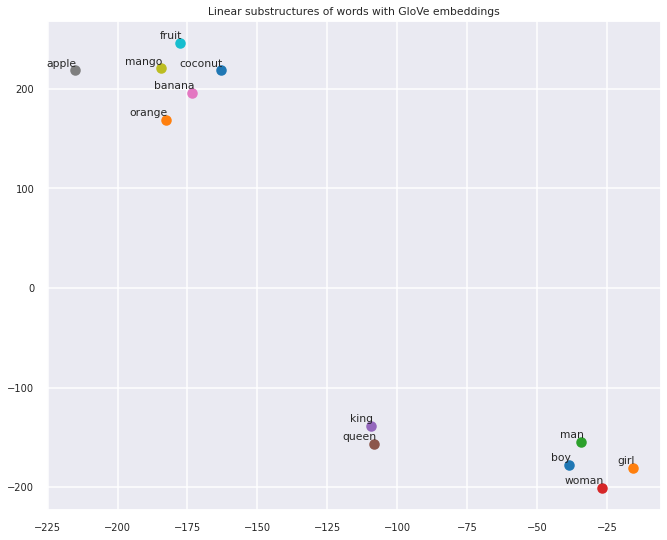

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk",  font_scale=0.6)

vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def glove_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42) #T-distributed Stochastic Neighbor Embedding
    coordinates = tsne_model.fit_transform(wordvecs) #The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    
    plt.figure(figsize=(11,9)) 
    plt.title('Linear substructures of words with GloVe embeddings')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

glove_plot(model)

# Training a Neural Network with PyTorch

In [60]:
import torch
import torch.nn as nn #Base class for all neural network modules.
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [61]:
data = pd.read_csv('california_housing_train.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [62]:
#Fill NaN values
data = data.fillna(0)
#Normalize values
data = (data-data.mean())/data.std()
#Separate features and targets
x_df = pd.DataFrame(data, columns=data.columns[:-1])
y_df = pd.DataFrame(data, columns=[data.columns[-1]]) #target = 'median_house_value'
#Save in tensors
x = torch.tensor(x_df.values, dtype=torch.float)
y = torch.tensor(y_df.values, dtype=torch.float)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: torch.Size([17000, 8])
y shape: torch.Size([17000, 1])


## Create a Neural Network

In [63]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1) # You can also try include activation functions to check how your model will behave
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        h1 = self.linear1(x)
        h2 = self.linear2(h1)
        h3 = self.linear3(h2)
        out = self.linear4(h3)
        return out

In [64]:
#Define layer sizes
D_in = x.shape[1]
H1 = 128 #size of the input sample
H2 = 64
H3 = 32
D_out = 1

#Define Hyperparameters
learning_rate = 1e-4 # You can also experiment with different learning rates

#Initialise model, loss, optimizer
model = Net(D_in, H1, H2, H3, D_out)
loss_func = nn.MSELoss(reduction='sum') # You can also try BCELoss and BCEWithLogitsLoss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # You can also try Adam and AdamW

#Initialise dataloader
dataset = torch.utils.data.TensorDataset(x, y) #class to represent the data as list of tensors. x=input_features, y=labels
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True) 

In [65]:
model

Net(
  (linear1): Linear(in_features=8, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=32, bias=True)
  (linear4): Linear(in_features=32, out_features=1, bias=True)
)

## Train Network

In [66]:
for epoch in range(5):
  batch_losses = []

  for x_batch, y_batch in dataloader:
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)
    batch_losses.append(loss.item())
    # print('y_pred=', y_pred[0])
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()
  
  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader):.5f}")
    

Epoch   0: Loss = 29.09840
Epoch   1: Loss = 23.78519
Epoch   2: Loss = 23.30187
Epoch   3: Loss = 23.23951
Epoch   4: Loss = 23.29651


Optuna framework sample

Optuna concepts
- Objective function: This function contains all the code of the machine learning task you want to optimize hyperparameters for, i.e. in our case it includes the training and validation loop for the neural network model.
- Trial: A trial is a single call of the objective function with a certain set of hyperparameters.
- Study: This represents a set of trials to be run. At the end of the study the trials can be compared and the best one(s) chosen. The best trials are the ones minimizing / maximizing the loss function for a machine learning model.
- Parameter: In our experiments we are trying to find the best combination of parameters to optimize our objective function. We do this by creating a study which consists of multiple trials, each of which runs with a different set of (hyper)parameters.

In [28]:
#Optuna sample

def suggest_hyperparameters(trial): #function to include the suggested hyperparameters
    # Experimenting with different optimizers
    optimizer_name = trial.suggest_categorical("optimizer_name", ["Adam", "AdamW"])
    return optimizer_name

#Optuna sample
def objective(trial):    
    optimizer_name = suggest_hyperparameters(trial)
    #Define layer sizes
    D_in = x.shape[1]
    H1 = 128 #size of the input sample
    H2 = 64
    H3 = 32
    D_out = 1

    #Define Hyperparameters
    learning_rate = 1e-4 # You can also experiment with different learning rates

    #Initialise model, loss, optimizer
    model = Net(D_in, H1, H2, H3, D_out)
    loss_func = nn.MSELoss(reduction='sum') # You can also try BCELoss and BCEWithLogitsLoss
    if optimizer_name == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == "AdamW":
        optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    elif optimizer_name == "SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # You can also try Adam and AdamW

    #Initialise dataloader
    dataset = torch.utils.data.TensorDataset(x, y) #class to represent the data as list of tensors. x=input_features, y=labels
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True) 
    for epoch in range(5):
        batch_losses = []

        for x_batch, y_batch in dataloader:
            y_pred = model(x_batch)
            
            loss = loss_func(y_pred, y_batch)
            batch_losses.append(loss.item())
            # print('y_pred=', y_pred[0])
            #Delete previously stored gradients
            optimizer.zero_grad()
            #Perform backpropagation starting from the loss calculated in this epoch
            loss.backward()
            #Update model's weights based on the gradients calculated during backprop
            optimizer.step()
        
        print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader):.5f}")
        epoch_loss = sum(batch_losses)/len(dataloader)
    return epoch_loss

optuna_sample = optuna.create_study(direction = 'minimize' , study_name = 'lr-minim-sample')
optuna_sample.optimize(objective, n_trials = 50) #the first parameter is the function that we want to optimise
print('numbers of the finished trials:' , len(optuna_sample.trials))
print('the best params:' , optuna_sample.best_trial.params)
print('the best value:' , optuna_sample.best_value)

# Best number of trials appears to be 50 , as it gave me the best hyperparameters for my model.